In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import re
import zapimoveis_scraper

%matplotlib inline

In [191]:
## Dados
zap_imoveis = zapimoveis_scraper.search(localization="go+goiania++setor-oeste", num_pages=8)
new_list_zap = {}

prices = []
areas = []
quartos = []
for zap_imovel in zap_imoveis:
    prices.append(int(re.sub('[^0-9]', '', zap_imovel.price)))
    areas.append(int(str(zap_imovel.total_area_m2).replace('m2', '')))
    quartos.append(int(re.sub('[^0-9]', '', zap_imovel.bedrooms)))

new_list_zap['tamanho'] = areas
new_list_zap['quartos'] = quartos
new_list_zap['preco'] = prices
apes = pd.DataFrame(new_list_zap)

In [192]:
## Normalizando os dados
apes = (apes - apes.mean()) / apes.std()

In [193]:
apes.head()

,tamanho,quartos,preco
0,-0.379081,-0.41789,-0.835964
1,0.242647,-0.41789,0.953304
2,-0.534513,0.41789,-0.758170
3,-0.249555,0.41789,0.175361
4,-0.322090,-0.41789,-0.505339


In [194]:
## TAXA DE APRENDIZADO ( velocidade de descida )
alpha = 0.01

In [195]:
## Pegando numero de features
n_features = len(apes.columns)-1
n_features

2

In [196]:
## VALORES INICIAIS PARA W's
w = np.random.rand(1,n_features+1) ## Gerando valores aleatórios entre 0 e 1
w

array([[0.58356699, 0.84963044, 0.49480727]])

In [197]:
## Transformando dataframe em numpy
X = np.array(apes.drop('preco', axis=1))
X # X equivale ao tamanho e ao numero de quartos

array([[-0.37908142, -0.41789036],
       [ 0.24264665, -0.41789036],
       [-0.53451344,  0.41789036],
       [-0.24955474,  0.41789036],
       [-0.32208968, -0.41789036],
       [-0.2236494 , -0.41789036],
       [ 0.08721463,  2.92523252],
       [-0.43089209, -0.41789036],
       [ 0.17529278, -0.41789036],
       [-0.32727075, -0.41789036],
       [-1.13033617, -1.25367108],
       [ 3.09223365,  0.41789036],
       [-0.37908142, -0.41789036],
       [ 0.24264665, -0.41789036],
       [-0.53451344,  0.41789036],
       [-0.24955474,  0.41789036],
       [-0.32208968, -0.41789036],
       [-0.2236494 , -0.41789036],
       [ 0.08721463,  2.92523252],
       [-0.43089209, -0.41789036],
       [ 0.17529278, -0.41789036],
       [-0.32727075, -0.41789036],
       [-1.13033617, -1.25367108],
       [ 3.09223365,  0.41789036],
       [-0.37908142, -0.41789036],
       [ 0.24264665, -0.41789036],
       [-0.53451344,  0.41789036],
       [-0.24955474,  0.41789036],
       [-0.32208968,

In [198]:
y = apes.iloc[:, 2:3].values
y # y equivale ao preço

array([[-0.83596441],
       [ 0.95330412],
       [-0.75817012],
       [ 0.17536128],
       [-0.5053387 ],
       [ 0.36984699],
       [-0.25250728],
       [-0.6414787 ],
       [ 0.36984699],
       [-0.56368441],
       [-1.01489126],
       [ 2.7036755 ],
       [-0.83596441],
       [ 0.95330412],
       [-0.75817012],
       [ 0.17536128],
       [-0.5053387 ],
       [ 0.36984699],
       [-0.25250728],
       [-0.6414787 ],
       [ 0.36984699],
       [-0.56368441],
       [-1.01489126],
       [ 2.7036755 ],
       [-0.83596441],
       [ 0.95330412],
       [-0.75817012],
       [ 0.17536128],
       [-0.5053387 ],
       [ 0.36984699],
       [-0.25250728],
       [-0.6414787 ],
       [ 0.36984699],
       [-0.56368441],
       [-1.01489126],
       [ 2.7036755 ],
       [-0.83596441],
       [ 0.95330412],
       [-0.75817012],
       [ 0.17536128],
       [-0.5053387 ],
       [ 0.36984699],
       [-0.25250728],
       [-0.6414787 ],
       [ 0.36984699],
       [-0

In [199]:
## CRIANDO X0 = 1
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X) , axis=1)

In [200]:
X = insert_ones(X)
X

array([[ 1.        , -0.37908142, -0.41789036],
       [ 1.        ,  0.24264665, -0.41789036],
       [ 1.        , -0.53451344,  0.41789036],
       [ 1.        , -0.24955474,  0.41789036],
       [ 1.        , -0.32208968, -0.41789036],
       [ 1.        , -0.2236494 , -0.41789036],
       [ 1.        ,  0.08721463,  2.92523252],
       [ 1.        , -0.43089209, -0.41789036],
       [ 1.        ,  0.17529278, -0.41789036],
       [ 1.        , -0.32727075, -0.41789036],
       [ 1.        , -1.13033617, -1.25367108],
       [ 1.        ,  3.09223365,  0.41789036],
       [ 1.        , -0.37908142, -0.41789036],
       [ 1.        ,  0.24264665, -0.41789036],
       [ 1.        , -0.53451344,  0.41789036],
       [ 1.        , -0.24955474,  0.41789036],
       [ 1.        , -0.32208968, -0.41789036],
       [ 1.        , -0.2236494 , -0.41789036],
       [ 1.        ,  0.08721463,  2.92523252],
       [ 1.        , -0.43089209, -0.41789036],
       [ 1.        ,  0.17529278, -0.417

In [201]:
## Função MSE(Média do erro ao quadrado)
def MSE(w,X,y):
    m = len(X)
    erro = (X@w.T - y)
    custo = np.sum(np.power(erro,2))
    
    return custo/m

In [202]:
epoch = 600

In [203]:
## Gradiente Descendente
def gradient_descent(w, X, y, alpha, epoch):
    custo = np.zeros(epoch)
    
    for i in range(epoch):
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        custo[i] = MSE(w, X, y)
    
    return w, custo

In [204]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

In [205]:
MSE(w, X, y)

0.13024362006644366

In [206]:
w

array([[ 0.00140348,  0.95000559, -0.10019439]])

Text(0.5, 1.0, 'Erro vs. Epoch')

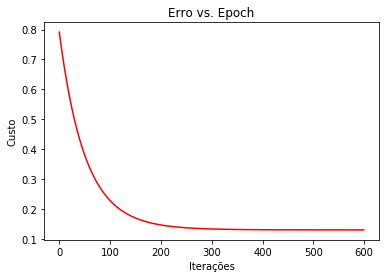

In [207]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')